In [169]:
library(tidyverse)
library("ggdark")
library("ggsci")
library("latex2exp")
source("../scripts/assembly-map.r")

In [170]:
all_data = read.csv("../data/raw//1.0_1000.0_1.0_10.0_.csv")
head(all_data)

,time,variable,value
,<dbl>,<chr>,<dbl>
1,56,variance_lengths,16.91723
2,56,molecule_count,307.00000
3,56,5,9.00000
4,56,12,3.00000
5,56,24,2.00000
6,56,8,5.00000


# Make distributions for time slices

In [171]:
individual_data = all_data %>% 
                    filter(!variable %in% 
                           c("variance_lengths", "average_lengths", "molecule_count"))
individual_data["AI"] <- assembly_index(as.numeric(individual_data$variable))



In [28]:
time_slices <- individual_data %>% filter(time %in% c(35.0))
reduced_slices <- time_slices %>% group_by(AI, time) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.



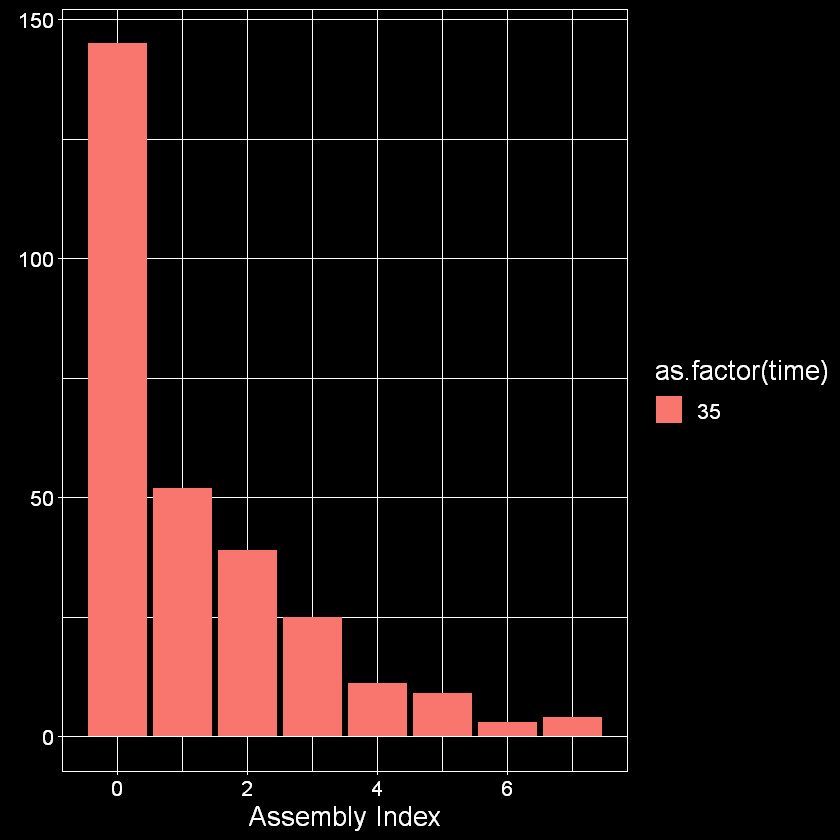

In [29]:
initial_dist <- ggplot(reduced_slices) + 
                    geom_col(aes(x = AI, y = total, fill = as.factor(time)), position = "dodge2") +
                    dark_theme_linedraw() +
                    theme(text = element_text(size=16), 
                         ) + 
                    labs(x = "Assembly Index", y = element_blank()) +
                    scale_color_nejm()

#ggsave("temp.svg", w = 89, h = 89, units = 'mm')
initial_dist

In [172]:
grouped_AI_ts <- individual_data %>% filter(time > 5.0) %>% group_by(AI, time) %>% summarise(total = sum(value))
average_AI <- grouped_AI_ts %>% group_by(AI) %>% summarise(ave = mean(total), std = sqrt(var(total)))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.



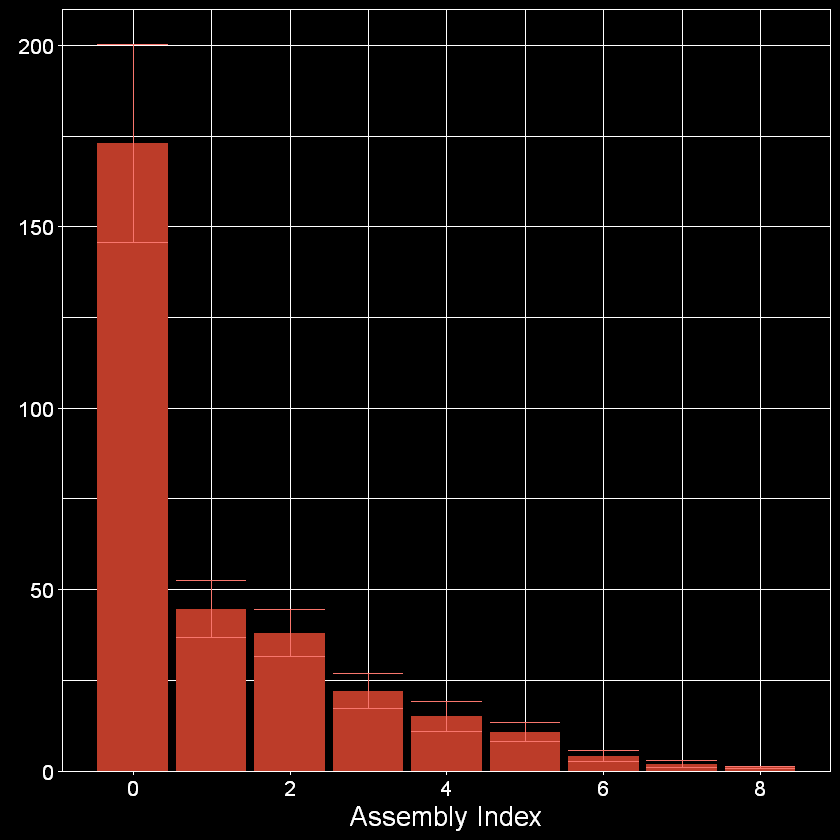

In [175]:
initial_dist <- ggplot(average_AI) + 
                    geom_col(aes(x = AI, y = ave, fill = "test"), position = "dodge2") +
                    geom_errorbar(aes(x = AI, ymin = ave - std, ymax = ave + std, color = "test")) +
                    dark_theme_linedraw() +
                    theme(text = element_text(size=16), 
                         legend.position = "none") + 
                    labs(x = "Assembly Index", y = element_blank()) +
                    scale_fill_nejm() + 
                    scale_y_continuous(expand = c(0, 0), lim = c(NA, 210)) # scale_y_log10()

ggsave("Well_mixed_AI_distribution_Presentation.jpeg", w = 89, h = 89, units = 'mm')
initial_dist

In [166]:
fit <- glm(log(ave) ~ AI, data = average_AI[average_AI$AI >1,])
#summary(fit)
pred.data <- data.frame(AI = seq(-0.5,10, length.out = 100))
pred.data$pred <- predict(fit, newdata = pred.data)
head(pred.data)
alpha = fit$coefficients[[2]]
alpha 

,AI,pred
,<dbl>,<dbl>
1,-0.50000000,5.307033
2,-0.39393939,5.243102
3,-0.28787879,5.179170
4,-0.18181818,5.115238
5,-0.07575758,5.051307
6,0.03030303,4.987375


[1] -0.6027846

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Removed 15 row(s) containing missing values (geom_path)."
Warning message:
"Removed 15 row(s) containing missing values (geom_path)."
Warning message:
"Removed 15 row(s) containing missing values (geom_path)."
Warning message:
"Removed 15 row(s) containing missing values (geom_path)."


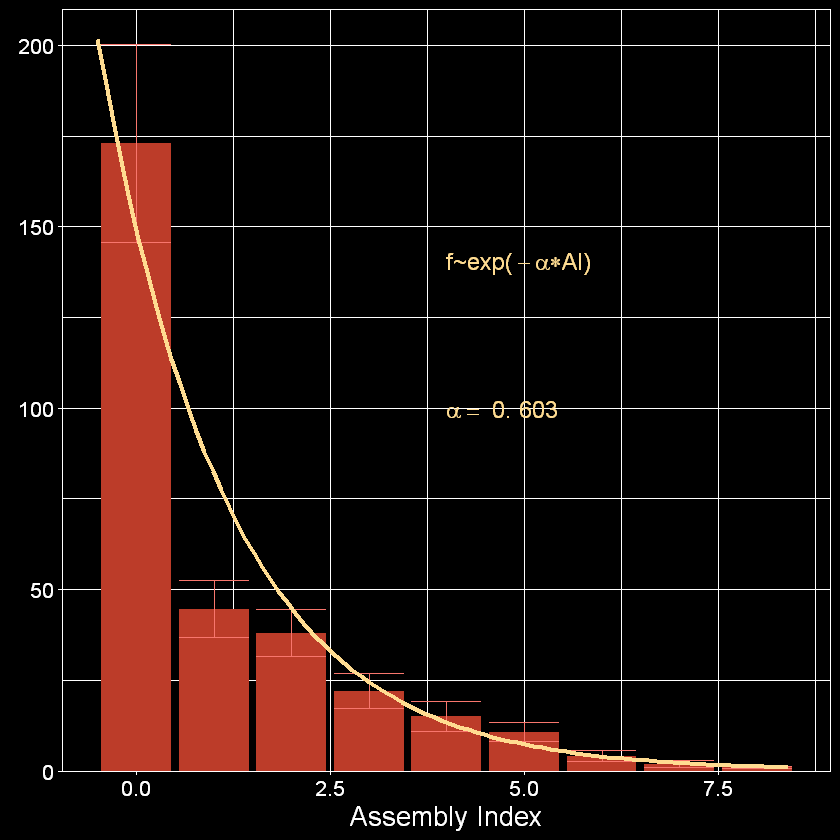

In [177]:
qn <- "$f ~ \\exp(-\\alpha * AI) $"
qn1 <- paste("$ \\alpha = $", -round(alpha, digits = 3))
initial_dist <- initial_dist + 
                    geom_line(aes(x = AI, y = exp(pred)), data = pred.data, size = 1.2, 
                              color = "#FFDC91FF") +
                    scale_y_continuous(expand = c(0, 0), lim = c(NA, 210)) + 
                    scale_x_continuous(lim = c(NA, 8.5)) +
                    annotate("text", x=4, y=140, 
                                label=TeX(qn, output="character"),
                                hjust=0, 
                                size = 5, 
                                parse = TRUE,
                                color = "#FFDC91FF") + 
                    annotate("text", x=4, y=100, 
                                label=TeX(qn1, output="character"),
                                hjust=0, 
                                size = 5, 
                                parse = TRUE,
                                color = "#FFDC91FF")
initial_dist
ggsave("Well_mixed_AI_distribution_annotate_Presentation.jpeg", w = 89, h = 89, units = 'mm')

In [168]:
a = 1.20345

In [162]:
round(a, digits = 2)


[1] 1.2

In [78]:
a = c(1,2,3,4)
sqrt(var(a))

[1] 1.290994

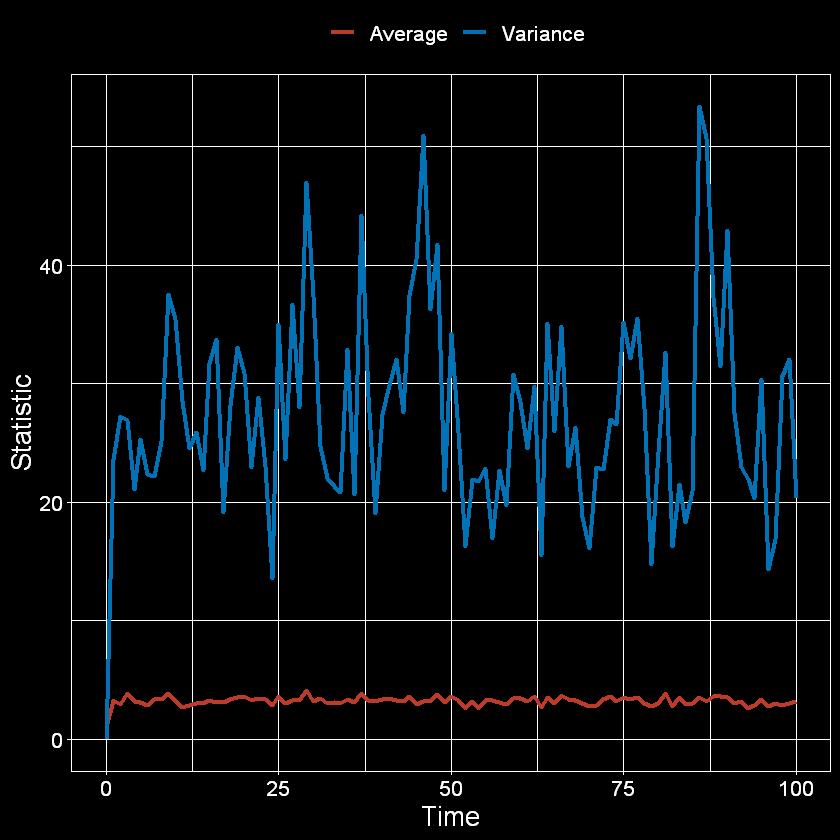

In [52]:
average_vs_t_plot <- ggplot(average_data) + geom_line(aes(x = time, y = value, color = variable), size = 1.2) +
                    #scale_y_continuous(lim = c(0, 1000)) + 
                    dark_theme_linedraw() +
                    theme(text = element_text(size=16), 
                          legend.position = "top") + 
                    labs(x = "Time", y = "Statistic", color = element_blank()) +
                    scale_color_nejm(labels = c("Average", "Variance"))

ggsave("Well_mixed_timeseries_average_Presentation.svg", w = 89, h = 89, units = 'mm')
average_vs_t_plot

In [18]:
averages_data = all_data %>% 
    filter(variable %in% c("variance_lengths", "average_lengths", "molecule_count"))
head(averages_data)

,time,variable,value
,<dbl>,<chr>,<dbl>
1,56,variance_lengths,16.917226
2,56,molecule_count,307.000000
3,56,average_lengths,3.257329
4,35,variance_lengths,32.862251
5,35,molecule_count,294.000000
6,35,average_lengths,3.401361


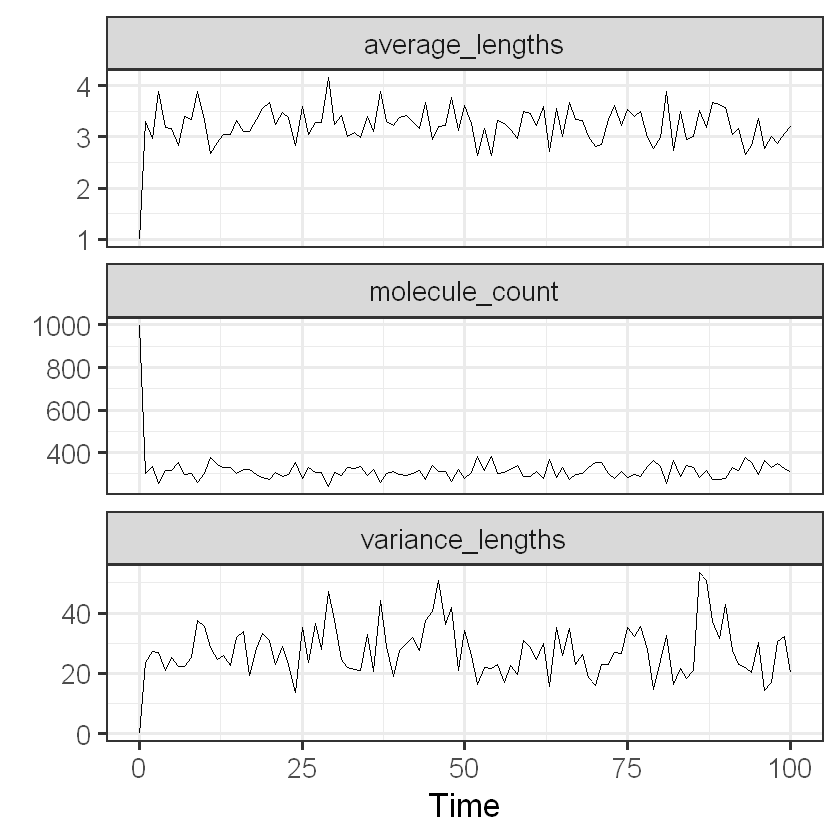

In [19]:
ggplot(averages_data, aes(x = time, y =value)) + 
    geom_line() + 
    labs(x = "Time", y = element_blank()) + 
    facet_wrap(~variable, ncol = 1, scales = "free_y") + 
    theme_bw(base_size = 20)

In [6]:
unique(all_data$variable)

[1] "variance_lengths" "molecule_count"   "5"                "12"              
 [5] "24"               "8"                "1"                "19"              
 [9] "6"                "11"               "9"                "14"              
[13] "3"                "7"                "25"               "4"               
[17] "13"               "15"               "2"                "10"              
[21] "18"               "average_lengths"  "16"               "20"              
[25] "17"               "22"               "43"               "31"              
[29] "39"               "51"               "23"               "32"              
[33] "26"               "56"               "30"               "80"              
[37] "27"               "49"               "45"               "29"              
[41] "33"               "48"               "21"               "47"              
[45] "69"               "40"               "35"               "97"              
[49] "66"               "34"               "28"               "38"              
[53] "57"               "36"               "44"               "59"              
[57] "55"               "37"               "63"               "41"              
[61] "53"               "54"               "46"               "58"              
[65] "61"               "42"               "52"               "50"              
[69] "65"               "102"              "70"               "96"

In [8]:
individual_data["AI"] <- assembly_index(as.numeric(individual_data$variable))

In [9]:
AI_timeseries <- individual_data %>% group_by(time, AI) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.



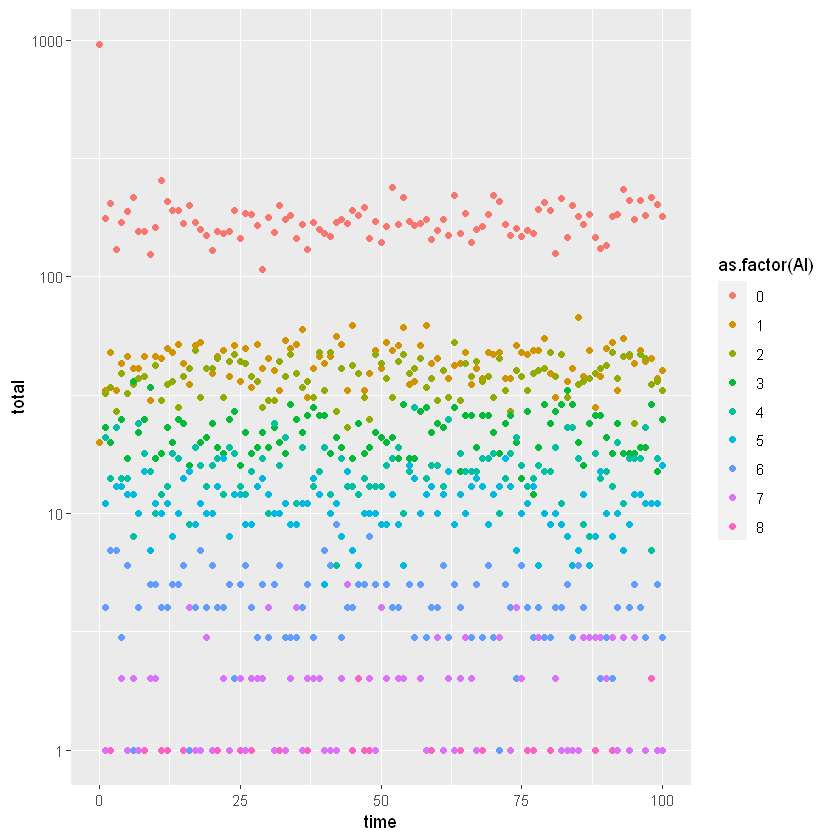

In [11]:
ggplot(AI_timeseries) + geom_point(aes(x = time, y = total, color = as.factor(AI))) + scale_y_log10()

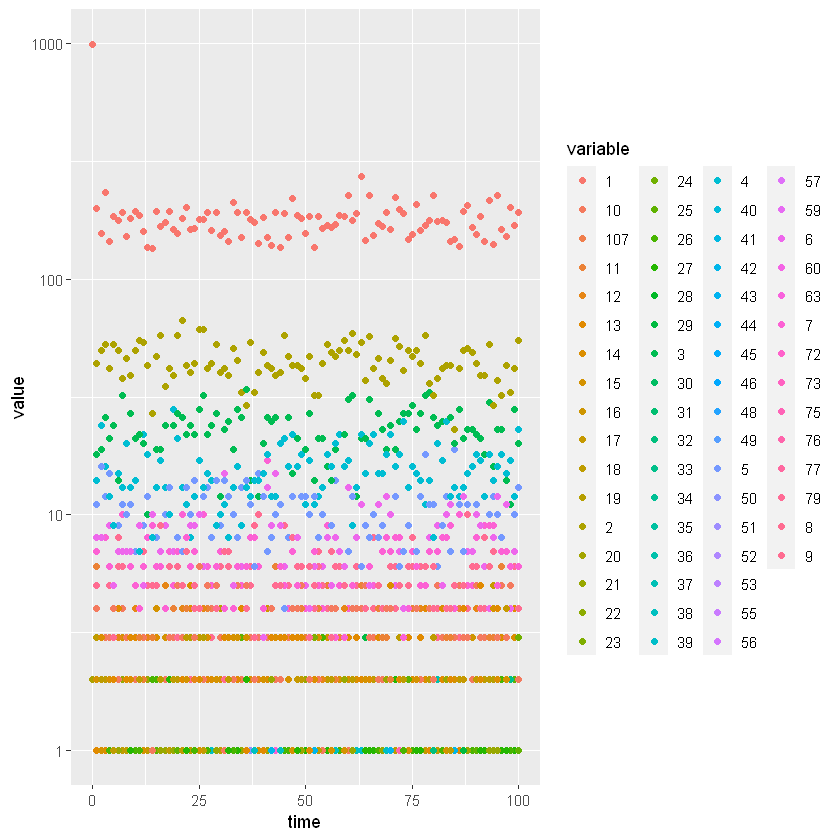

In [56]:
ggplot(individual_data) + geom_point(aes(x = time, y = value, color = variable)) + scale_y_log10()

In [12]:
twice_observed_data = individual_data[individual_data$value > 1,]

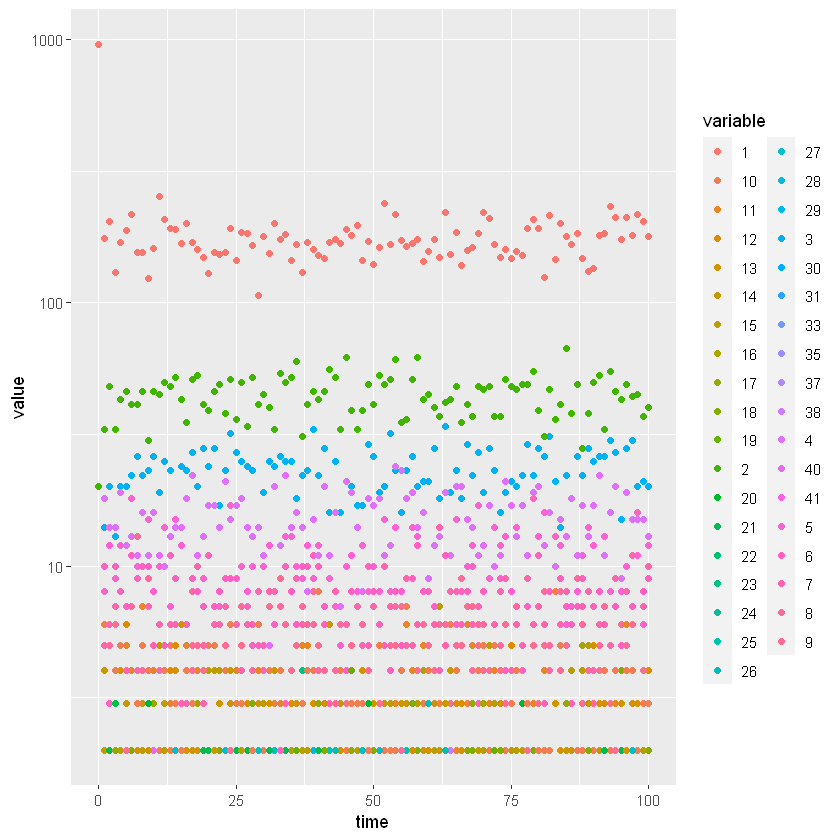

In [13]:
ggplot(twice_observed_data) + geom_point(aes(x = time, y = value, color = variable)) + scale_y_log10()